### We want to understand why value loss is so high in the beginning

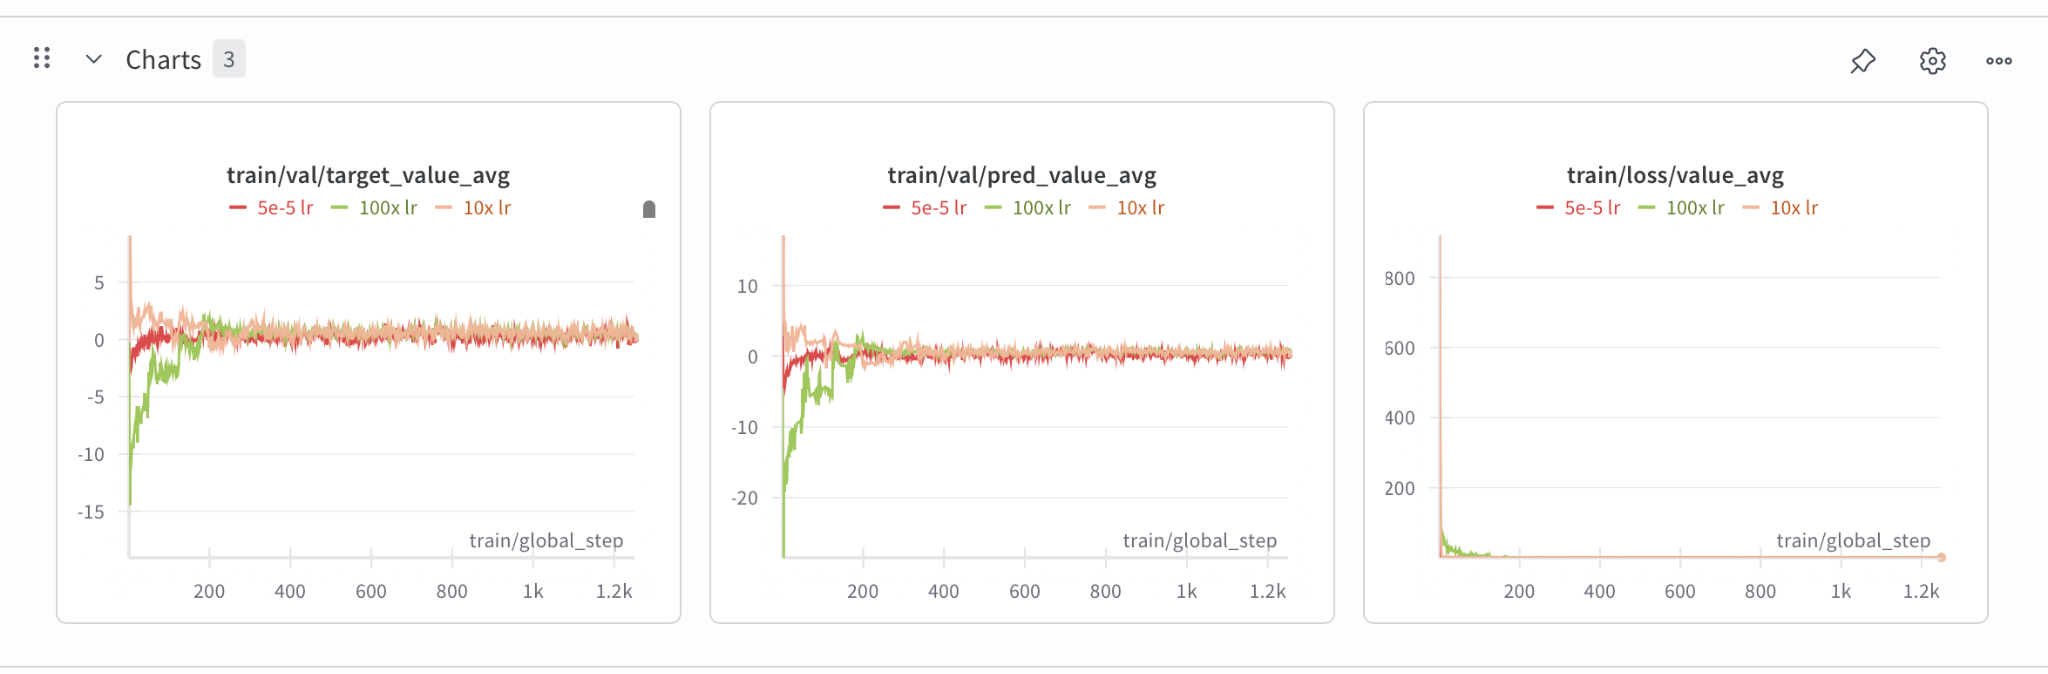

In [1]:
import wandb
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
api = wandb.Api()
hun_lr_run = api.run("prathyusha1-the-university-of-texas-at-austin/huggingface/otuaen1z")
ten_lr_run = api.run("prathyusha1-the-university-of-texas-at-austin/huggingface/rc2kygk1")
lr_run = api.run("prathyusha1-the-university-of-texas-at-austin/huggingface/r8wer0o4")

In [3]:
hun_df = hun_lr_run.history(keys=["train/val/pred_value_avg", "train/val/target_value_avg", "train/loss/value_avg"])
ten_df = ten_lr_run.history(keys=["train/val/pred_value_avg", "train/val/target_value_avg", "train/loss/value_avg"])
df = lr_run.history(keys=["train/val/pred_value_avg", "train/val/target_value_avg", "train/loss/value_avg"])


In [4]:
df["value_error"] = df["train/val/target_value_avg"] - df["train/val/pred_value_avg"]
df["abs_error"] = df["value_error"].abs()

### checking over and under bias

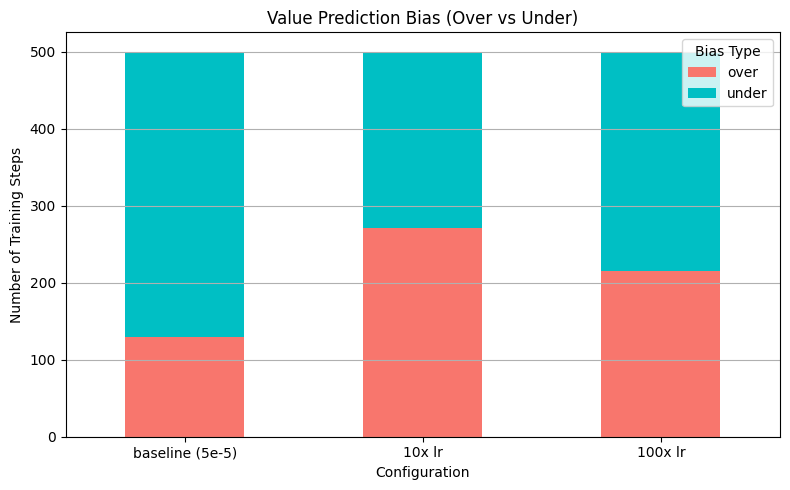

In [5]:
all_dfs = {
    "baseline (5e-5)": df,
    "10x lr": ten_df,
    "100x lr": hun_df,
}

bias_counts = {}

# Step 3: Calculate bias type for each config
for label, d in all_dfs.items():
    d["value_error"] = d["train/val/target_value_avg"] - d["train/val/pred_value_avg"]
    bias_sign = d["value_error"].apply(lambda x: "over" if x < 0 else "under")
    bias_counts[label] = bias_sign.value_counts()

# Step 4: Convert to DataFrame for plotting
bias_df = pd.DataFrame(bias_counts).T.fillna(0)

# Step 5: Plot as a stacked bar chart
bias_df.plot(kind="bar", stacked=True, figsize=(8, 5), color=["#f8766d", "#00bfc4"])
plt.title("Value Prediction Bias (Over vs Under)")
plt.ylabel("Number of Training Steps")
plt.xlabel("Configuration")
plt.xticks(rotation=0)
plt.legend(title="Bias Type")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


### checking std.dev of predicted and target value models for all 3 models

In [6]:
df

,_step,train/val/pred_value_avg,train/val/target_value_avg,train/loss/value_avg,value_error,abs_error
0,1,2.087196,-0.492328,8.645938,-2.579524,2.579524
1,4,-4.448730,-2.276942,5.562313,2.171788,2.171788
2,7,-3.982422,-1.898539,5.672654,2.083883,2.083883
3,10,-1.608887,-0.813892,1.185184,0.794994,0.794994
4,12,-2.380737,-1.138100,2.061962,1.242638,1.242638
...,...,...,...,...,...,...
495,1240,0.138336,-0.063221,0.670524,-0.201557,0.201557
496,1243,0.515890,0.900976,0.566035,0.385086,0.385086
497,1245,0.101038,0.392128,0.512126,0.291091,0.291091
498,1247,0.714752,0.886914,0.447840,0.172162,0.172162


In [15]:
new_metrics = [
    "_step",
    "train/val/pred_value_std",
    "train/val/target_value_std",
    "train/val/td_error_training_std"
]

new_metrics_df = lr_run.history(keys=new_metrics, pandas=True)
new_metrics_df_hun = hun_lr_run.history(keys=new_metrics, pandas=True)
new_metrics_df_ten = ten_lr_run.history(keys=new_metrics, pandas=True)
# df = pd.merge(df, new_metrics_df, on="_step", how="left")
ten_df = pd.merge(ten_df, new_metrics_df_ten, on="_step", how="left")
hun_df = pd.merge(hun_df, new_metrics_df_hun, on="_step", how="left")

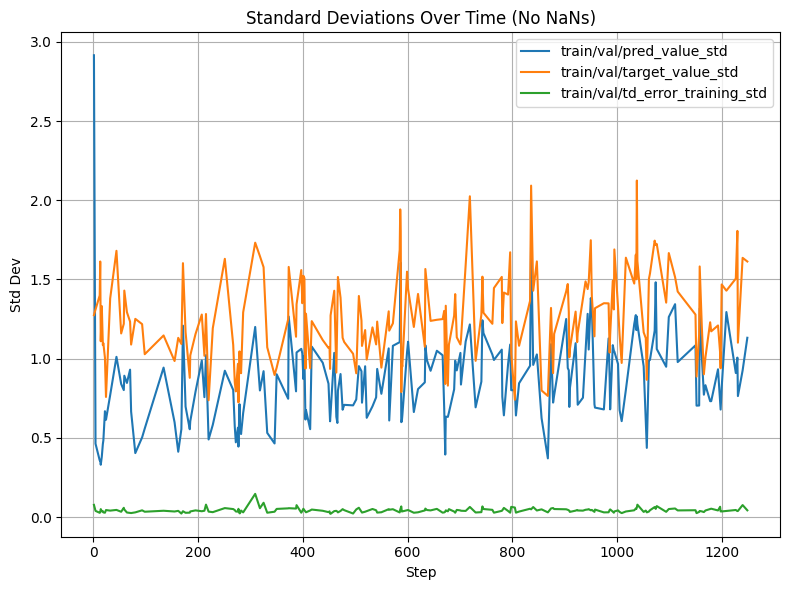

In [ ]:
# Drop rows with NaNs in any of the three std columns
filtered_df = df.dropna(subset=[
    "train/val/pred_value_std",
    "train/val/target_value_std",
    "train/val/td_error_training_std"
])

# Plot the filtered data
plt.figure(figsize=(8, 6))
plt.plot(filtered_df["_step"], filtered_df["train/val/pred_value_std"], label="train/val/pred_value_std")
plt.plot(filtered_df["_step"], filtered_df["train/val/target_value_std"], label="train/val/target_value_std")
plt.plot(filtered_df["_step"], filtered_df["train/val/td_error_training_std"], label="train/val/td_error_training_std")

plt.xlabel("Step")
plt.ylabel("Std Dev")
plt.title("Standard Deviations Over Time (No NaNs)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


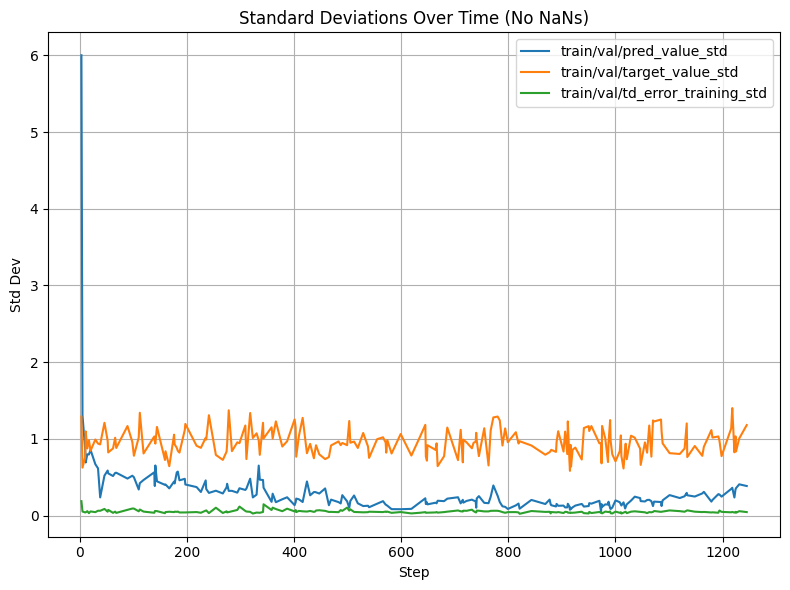

In [16]:
# Drop rows with NaNs in any of the three std columns
filtered_df = ten_df.dropna(subset=[
    "train/val/pred_value_std",
    "train/val/target_value_std",
    "train/val/td_error_training_std"
])

# Plot the filtered data
plt.figure(figsize=(8, 6))
plt.plot(filtered_df["_step"], filtered_df["train/val/pred_value_std"], label="train/val/pred_value_std")
plt.plot(filtered_df["_step"], filtered_df["train/val/target_value_std"], label="train/val/target_value_std")
plt.plot(filtered_df["_step"], filtered_df["train/val/td_error_training_std"], label="train/val/td_error_training_std")

plt.xlabel("Step")
plt.ylabel("Std Dev")
plt.title("Standard Deviations Over Time (No NaNs)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


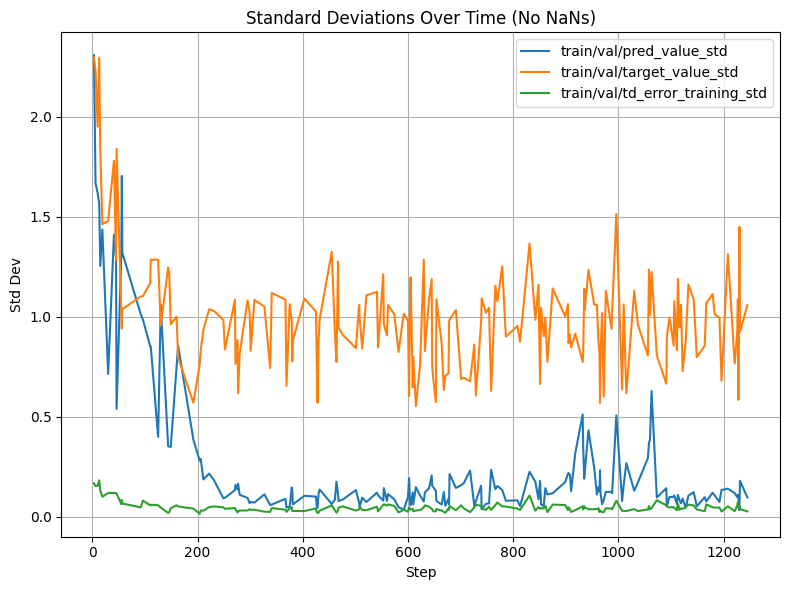

In [17]:
# Drop rows with NaNs in any of the three std columns
filtered_df = hun_df.dropna(subset=[
    "train/val/pred_value_std",
    "train/val/target_value_std",
    "train/val/td_error_training_std"
])

# Plot the filtered data
plt.figure(figsize=(8, 6))
plt.plot(filtered_df["_step"], filtered_df["train/val/pred_value_std"], label="train/val/pred_value_std")
plt.plot(filtered_df["_step"], filtered_df["train/val/target_value_std"], label="train/val/target_value_std")
plt.plot(filtered_df["_step"], filtered_df["train/val/td_error_training_std"], label="train/val/td_error_training_std")

plt.xlabel("Step")
plt.ylabel("Std Dev")
plt.title("Standard Deviations Over Time (No NaNs)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
